# New Section

In [48]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('data.csv')

##Question1

####data preperation step

In [44]:

import numpy as np
import pandas as pd

monthly_days = np.arange(0, 30)
base_date = np.datetime64('2020-01-01')
random_date = base_date + np.random.choice(monthly_days)
day1 =[]
for i in range(10):
  random_date = base_date + np.random.choice(monthly_days)
  day1.append(random_date)
day2 = []
base_date = np.datetime64('2000-01-01')
for i in range(10):
  random_date = base_date + np.random.choice(monthly_days)
  day2.append(random_date)
day3 = []
base_date = np.datetime64('2010-01-01')
for i in range(10):
  random_date = base_date + np.random.choice(monthly_days)
  day3.append(random_date)
datesList =  list(zip(day1, day2, day3))
dfObj = pd.DataFrame(datesList, columns = ['date1' , 'date2', 'date3']) 
dfObj

  

,date1,date2,date3
0,2020-01-02,2000-01-30,2010-01-09
1,2020-01-03,2000-01-01,2010-01-16
2,2020-01-25,2000-01-19,2010-01-04
3,2020-01-03,2000-01-28,2010-01-15
4,2020-01-23,2000-01-26,2010-01-28
5,2020-01-02,2000-01-23,2010-01-10
6,2020-01-19,2000-01-05,2010-01-13
7,2020-01-02,2000-01-22,2010-01-21
8,2020-01-17,2000-01-06,2010-01-23
9,2020-01-29,2000-01-05,2010-01-10


In [45]:
listing = []
df = pd.DataFrame()

#the answer for the first question
def DateDiff(df):
  for col in df.columns:
   if df[col].dtype == 'datetime64[ns]':
      listing.append(col)
  for i in range(len(listing)-1):
    df[listing[i] +'-'+ listing[i+1]] = (abs((df[listing[i]] - df[listing[i+1]])))
  df[listing[-1] +'-'+ listing[0]] = (abs((df[listing[-1]] - df[listing[0]]))) 
   
DateDiff(dfObj)
dfObj
#column = abs(dfObj[listing[1]] - dfObj[listing[2]])
#dfObj['date1-date2'] = column
#dfObj

,date1,date2,date3,date1-date2,date2-date3,date3-date1
0,2020-01-02,2000-01-30,2010-01-09,7277 days,3632 days,3645 days
1,2020-01-03,2000-01-01,2010-01-16,7307 days,3668 days,3639 days
2,2020-01-25,2000-01-19,2010-01-04,7311 days,3638 days,3673 days
3,2020-01-03,2000-01-28,2010-01-15,7280 days,3640 days,3640 days
4,2020-01-23,2000-01-26,2010-01-28,7302 days,3655 days,3647 days
5,2020-01-02,2000-01-23,2010-01-10,7284 days,3640 days,3644 days
6,2020-01-19,2000-01-05,2010-01-13,7319 days,3661 days,3658 days
7,2020-01-02,2000-01-22,2010-01-21,7285 days,3652 days,3633 days
8,2020-01-17,2000-01-06,2010-01-23,7316 days,3670 days,3646 days
9,2020-01-29,2000-01-05,2010-01-10,7329 days,3658 days,3671 days


##Question2

In [46]:
data = pd.read_csv('data.csv')
#sample data: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
data.shape


(569, 33)

In [49]:
data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')


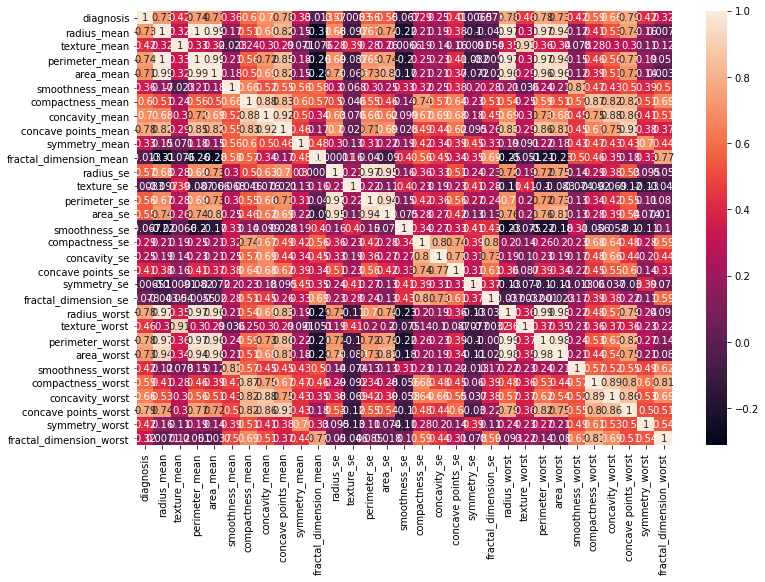

In [50]:
pd.options.display.float_format = '{:, .3f}'.format
corrmat = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, annot = True)

In [51]:
#function to remove correlation
#dataframe must be undergone data cleaning steps
def get_correlation(data, threshold): #takes dataframe and threshold of correlation
    corr_col = set()  #to get rid of duplicates
    corrmat = data.corr()  #applying .corr() method on data
    for i in range(len(corrmat.columns)):  #iterating on each column
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [56]:
corr_features = get_correlation(data, 0.85)
corr_features

set()

In [57]:
data_uncorr = data.drop(labels=corr_features, axis = 1, inplace = True)
data.shape

(569, 18)